In [1]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

import matplotlib.pyplot as plt
from data_io import read_iq_data
from visualisation import plot_payload, subplots_iq
from receiver import ReceiverBLE, Receiver802154
from transmitter import TransmitterBLE, Transmitter802154
from interference_utils import subtract_interference_wrapper, multiply_by_complex_exponential
import numpy as np

[ 0  0  0  0  2  4  6  8 10 12]
est_frequency = 16620 [Hz]
est_amplitude = 0.64 [-]
est_phase = 0.80 [rad]
est_samples_shift = 456 [samples]


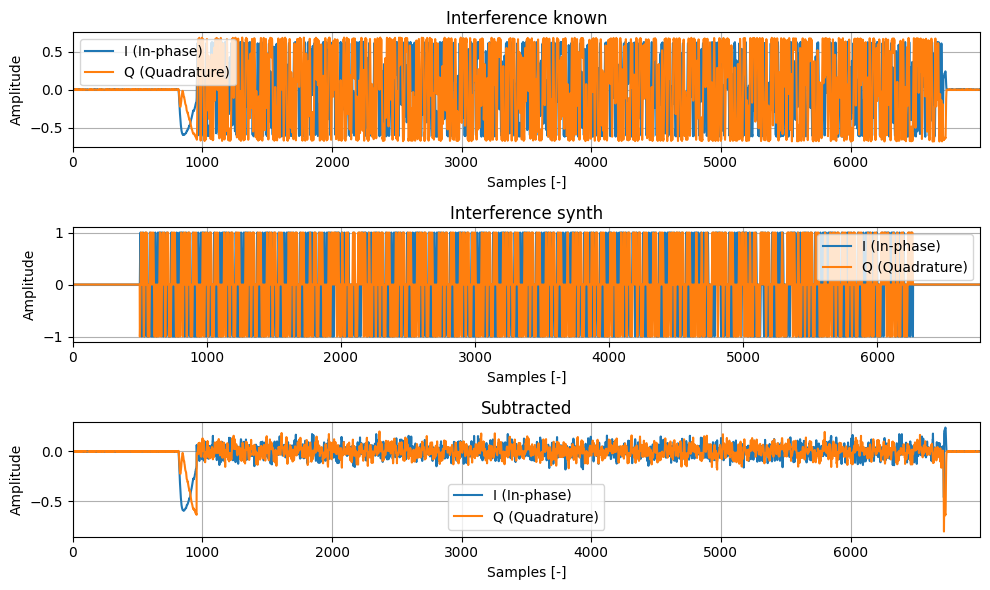

In [2]:
affected = "ble"
interference = "802154"


# Hardcoded filenames for now
if affected == "ble":
    reference_filename = "BLE_0dBm.dat"
    if interference == "802154":
        affected_filename = "BLE_802154_0dBm_8dBm_0MHz.dat"
        interference_filename = "802154_8dBm_0MHz.dat"
    elif interference == "tone":
        affected_filename = "BLE_tone_0dBm_8dBm_0MHz.dat"
        interference_filename = "tone_8dBm_0MHz_BLE.dat"
    else:
        exit()
elif affected == "802154":
    reference_filename = "802154_0dBm.dat"
    if interference == "ble":
        affected_filename = "802154_BLE_0dBm_8dBm_0MHz.dat"
        interference_filename = "BLE_8dBm_0MHz.dat"
    elif interference == "tone":
        affected_filename = "802154_tone_0dBm_8dBm_0MHz.dat"
        interference_filename = "tone_8dBm_0MHz_802154.dat"
    else:
        exit()
else:
    exit()

"""Open reference packet (for BER comparison)"""
# Hardcoded parameters for now
fs: int | float = 10e6  # Hz
relative_path: str = "../../capture_nRF/data/new/"

# Open file, demodulate and get reference packet
iq_reference = read_iq_data(f"{relative_path}{reference_filename}")
if affected == "ble":
    affected_receiver = ReceiverBLE(fs=fs)
else:
    affected_receiver = Receiver802154(fs=fs)

bit_samples = affected_receiver.demodulate(iq_reference)  # From IQ samples to hard decisions

"""Open affected and interference files"""
iq_affected = read_iq_data(f"{relative_path}{affected_filename}")

"""This is different from the known interference scenario, the interference is demodulated first and then modulated."""
if interference == "ble":
    interference_receiver = ReceiverBLE(fs=fs)
    interference_transmitter = TransmitterBLE(fs=fs)
else:
    interference_receiver = Receiver802154(fs=fs)
    interference_transmitter = Transmitter802154(fs=fs)

# Demodulate the interference
bit_samples = interference_receiver.demodulate(iq_affected)  # From IQ samples to hard decisions
interference_packet: list[dict] = interference_receiver.process_phy_packet(bit_samples)
interference_packet: dict = interference_packet[0]
print(interference_packet["payload"])

# Synthesise the interference
iq_interference = interference_transmitter.process_phy_payload(interference_packet["payload"])
iq_interference = interference_transmitter.modulate(iq_interference, zero_padding=500)

iq_interference_known = read_iq_data(f"{relative_path}{interference_filename}")

"""Subtract the synthesised interference and demodulate (blind analysis)"""
freq_range = range(0, 45000, 10)

subtracted = subtract_interference_wrapper(
    affected=iq_interference_known, interference=iq_interference, fs=fs, freq_offsets=freq_range, verbose=True
)
subplots_iq(
    [iq_interference_known, iq_interference, subtracted],
    fs,
    ["Interference known", "Interference synth", "Subtracted"],
    show=False,
)

plt.show()

[  0   0   0   0   2   4   6   8  10  12  14  16  18  20  22  24  26  28
  30  32  34  36  38 104  42  44  46  48  50  52  54  56  58  60  62  64
  66  68  70  72  74  76  78  80  82  84  86  88  90  92  94  96  98 100
 102 104 106 108 110 112 114 116 118 120 122 124 126 128 130 132 134 136
 138 140 142 144 146 148 150 152 154 156 158 160 162 164 166 168 170 172
 174 176 178 180 182 184 186 188 188 192 194 196 198 200 202 204 206 208
 210 212 214 216 218 220 222 224 226 228 230 232 234 236 238 240]
est_frequency = 25810 [Hz]
est_amplitude = 0.38 [-]
est_phase = 2.83 [rad]
est_samples_shift = 4458 [samples]


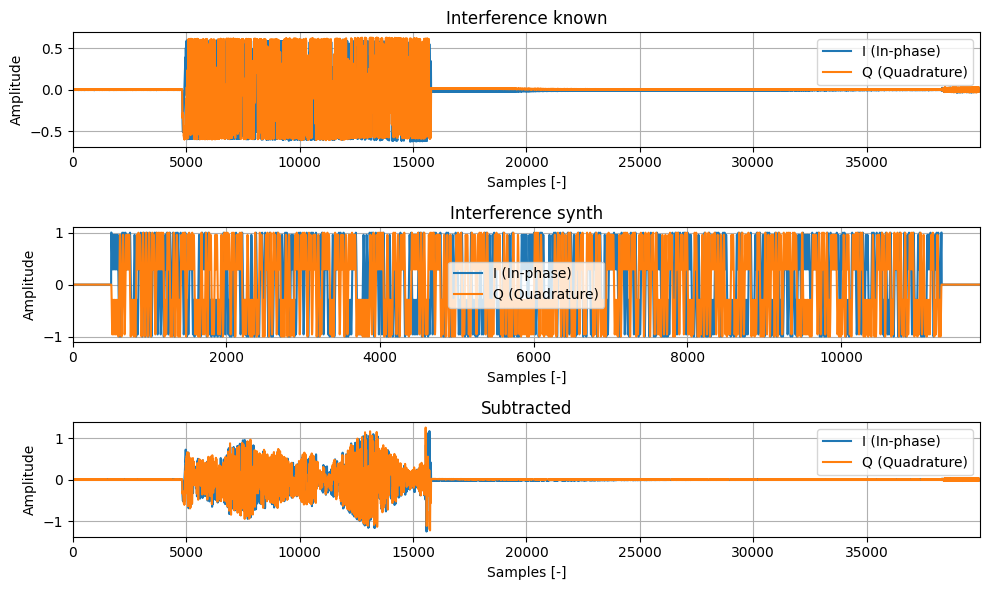

In [ ]:
affected = "802154"
interference = "ble"


# Hardcoded filenames for now
if affected == "ble":
    reference_filename = "BLE_0dBm.dat"
    if interference == "802154":
        affected_filename = "BLE_802154_0dBm_8dBm_0MHz.dat"
        interference_filename = "802154_8dBm_0MHz.dat"
    elif interference == "tone":
        affected_filename = "BLE_tone_0dBm_8dBm_0MHz.dat"
        interference_filename = "tone_8dBm_0MHz_BLE.dat"
    else:
        exit()
elif affected == "802154":
    reference_filename = "802154_0dBm.dat"
    if interference == "ble":
        affected_filename = "802154_BLE_0dBm_8dBm_0MHz.dat"
        interference_filename = "BLE_8dBm_0MHz.dat"
    elif interference == "tone":
        affected_filename = "802154_tone_0dBm_8dBm_0MHz.dat"
        interference_filename = "tone_8dBm_0MHz_802154.dat"
    else:
        exit()
else:
    exit()

"""Open reference packet (for BER comparison)"""
# Hardcoded parameters for now
fs: int | float = 10e6  # Hz
relative_path: str = "../../capture_nRF/data/new/"

# Open file, demodulate and get reference packet
iq_reference = read_iq_data(f"{relative_path}{reference_filename}")
if affected == "ble":
    affected_receiver = ReceiverBLE(fs=fs)
else:
    affected_receiver = Receiver802154(fs=fs)

bit_samples = affected_receiver.demodulate(iq_reference)  # From IQ samples to hard decisions

"""Open affected and interference files"""
iq_affected = read_iq_data(f"{relative_path}{affected_filename}")

"""This is different from the known interference scenario, the interference is demodulated first and then modulated."""
if interference == "ble":
    interference_receiver = ReceiverBLE(fs=fs)
    interference_transmitter = TransmitterBLE(fs=fs)
else:
    interference_receiver = Receiver802154(fs=fs)
    interference_transmitter = Transmitter802154(fs=fs)

# Demodulate the interference
bit_samples = interference_receiver.demodulate(iq_affected)  # From IQ samples to hard decisions
interference_packet: list[dict] = interference_receiver.process_phy_packet(bit_samples)
interference_packet: dict = interference_packet[0]
print(interference_packet["payload"])

# Synthesise the interference
iq_interference = interference_transmitter.process_phy_payload(interference_packet["payload"])
iq_interference = interference_transmitter.modulate(iq_interference, zero_padding=500)

iq_interference_known = read_iq_data(f"{relative_path}{interference_filename}")

"""Subtract the synthesised interference and demodulate (blind analysis)"""
freq_range = range(25000, 30000, 10)

subtracted = subtract_interference_wrapper(
    affected=iq_interference_known,
    interference=iq_interference,
    fs=fs,
    freq_offsets=freq_range,
    verbose=True,
    amplitude=0.64,
    samples_shift=4460,
)
subplots_iq(
    [iq_interference_known, iq_interference, subtracted],
    fs,
    ["Interference known", "Interference synth", "Subtracted"],
    show=False,
)

plt.show()